<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/ML_O3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt


# reading the csv files created in data_cleaning_and_merging module
df = pd.read_csv('/content/O3Data.csv')

df['Ozone(ppm)'] = df['Ozone(ppm)'] * 100
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.head()

,date,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,Ozone(ppm)
0,2015-01-01,2,70,13,98,87,0.2,1025,10,4,1,3.8,0.7882
1,2015-01-02,4,137,13,99,89,0.1,1019,8,5,4,3.8,0.6471
2,2015-01-03,7,277,11,35,78,0.1,1016,9,14,3,7.1,2.1882
3,2015-01-04,6,218,17,2,67,0.0,1030,10,8,2,8.7,2.8625
4,2015-01-05,3,93,10,1,56,0.0,1036,10,8,-2,8.7,2.2042


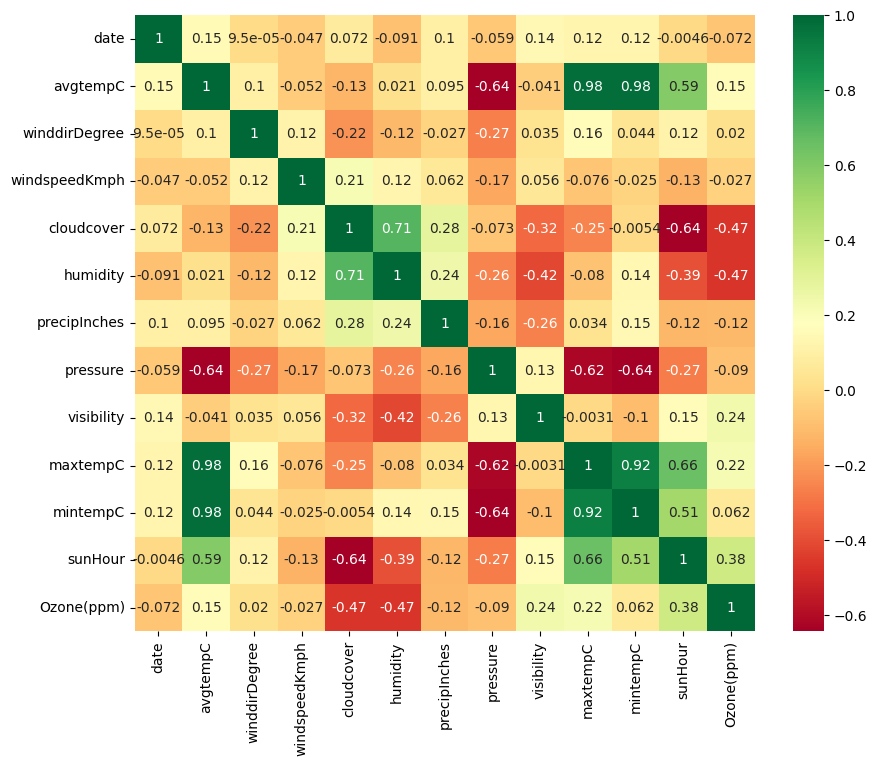

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X = df[['maxtempC', 'humidity', 'winddirDegree', 'windspeedKmph', 'cloudcover']]
y = df['Ozone(ppm)']

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

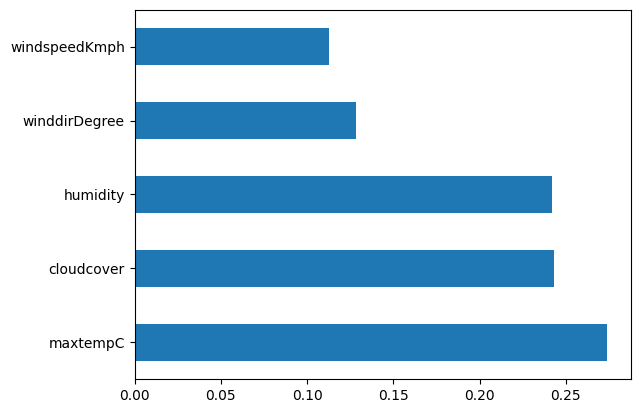

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<ipython-input-25-0f415a98584e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

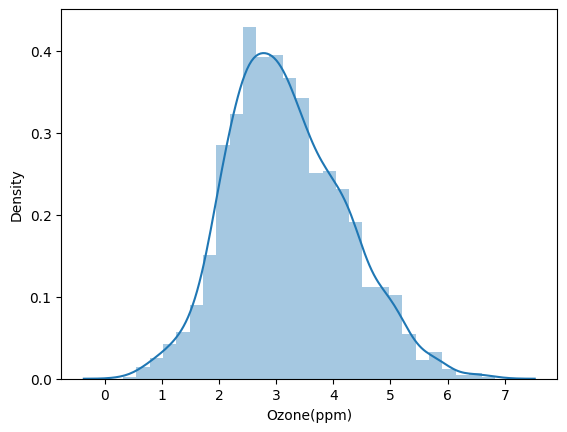

In [25]:
sns.distplot(y)

# Linear Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import scipy
import statsmodels.api as sm

# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
print('coefficients: ', [f"{coef:.2f}" for coef in lm.coef_])
print('intercept: {:.2f}'.format(lm.intercept_))

coefficients:  ['0.02', '-0.02', '-0.00', '0.02', '-0.01']
intercept: 4.38


In [31]:
score = cross_val_score(lm, X, y, cv=5)
score.mean()

0.24269691621054745

## Predictions

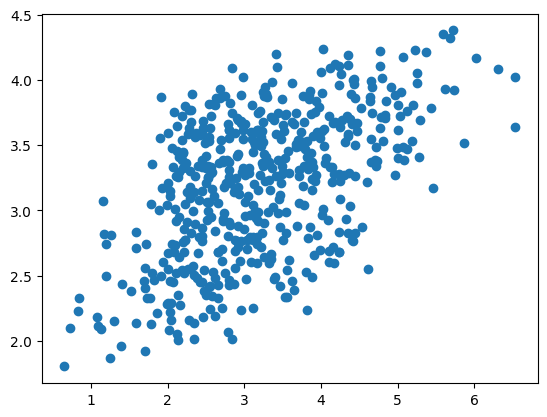

In [33]:
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)

plt.scatter(y_test, y_test_predictions)
plt.show()

<ipython-input-34-ed59111c27cd>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

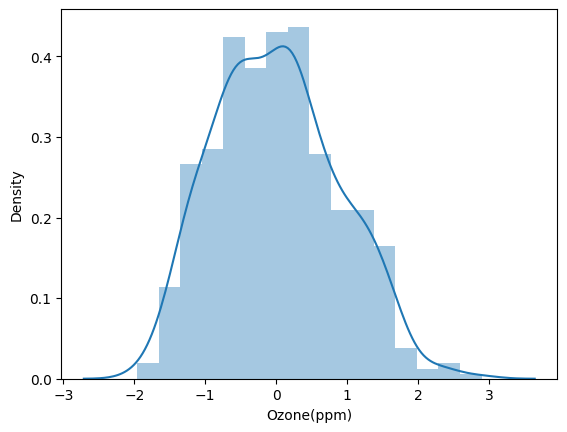

In [34]:
sns.distplot(y_test-y_test_predictions)

In [36]:
from sklearn import metrics
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predictions)))
print('MSE: {:.2f}'.format(metrics.mean_squared_error(y_test, y_test_predictions)))
print('RMSE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predictions))))

MAE: 0.71
MSE: 0.76
RMSE: 0.87


In [37]:
# R squared score for the training data
print(f"Coefficient of determination R^2 <-- on training set: {r2_score(y_train, y_train_predictions):.2f}")

# R squared score for the test data. The closer the score is to 1 the better is the model
print(f"Coefficient of determination R^2 <-- on test set: {r2_score(y_test, y_test_predictions):.2f}")


Coefficient of determination R^2 <-- on training set: 0.29
Coefficient of determination R^2 <-- on test set: 0.29


In [38]:
import scipy
import statsmodels.api as sm

X_constant = sm.add_constant(X)
pd.DataFrame(X_constant)
# Fit regression model
results = sm.OLS(y, X_constant).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Ozone(ppm)   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.51e-126
Time:                        18:24:03   Log-Likelihood:                -2195.1
No. Observations:                1734   AIC:                             4402.
Df Residuals:                    1728   BIC:                             4435.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5502      0.148     30.669

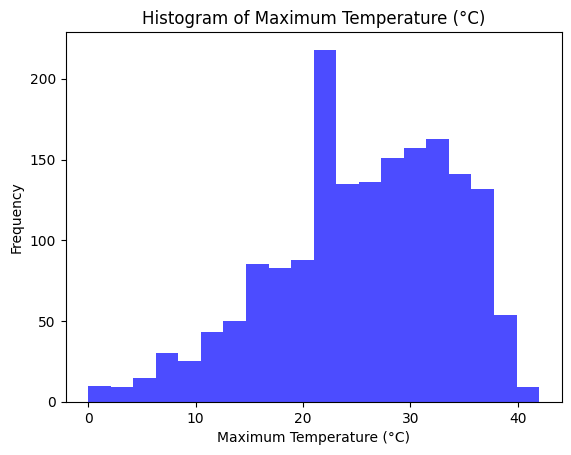

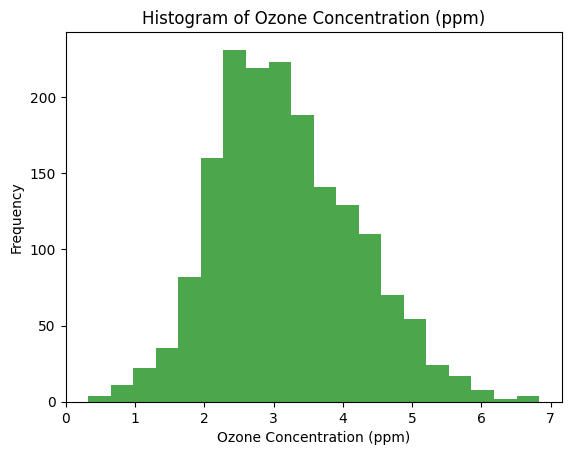

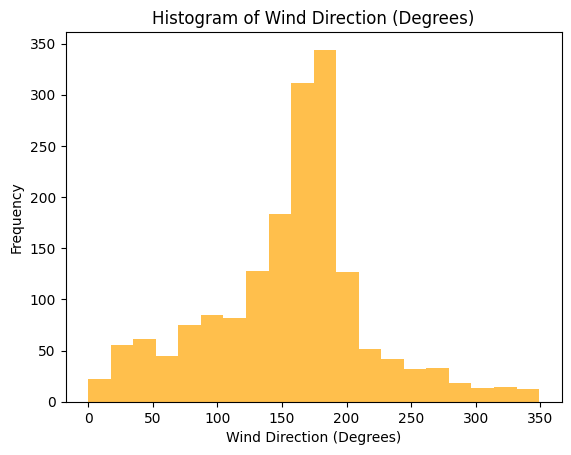

In [40]:
plt.hist(df['maxtempC'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Maximum Temperature (°C)')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['Ozone(ppm)'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Ozone Concentration (ppm)')
plt.xlabel('Ozone Concentration (ppm)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['winddirDegree'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Wind Direction (Degrees)')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('Frequency')
plt.show()


In [42]:
X = df[['avgtempC', 'winddirDegree', 'windspeedKmph', 'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility', 'maxtempC', 'mintempC', 'sunHour']]
y = df['Ozone(ppm)']

model = LinearRegression()
model.fit(X,y)

result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
humidity,0.137804
maxtempC,0.110235
date,0.097464
precipInches,0.042010
mintempC,0.029815
pressure,0.023737
cloudcover,0.021024
winddirDegree,0.011400
windspeedKmph,0.006327


In [43]:
scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)

In [44]:
stand_coef_linear_reg.fit(X, y)
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, combined_oz_weather_data.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,0.821109
date,0.755626
cloudcover,0.298527
precipInches,0.234810
windspeedKmph,0.183837
avgtempC,0.174047
mintempC,0.086521
winddirDegree,0.057478
pressure,0.033870


## Implementing Linear Regression with important features based on standardized results

In [46]:
X = df[['maxtempC', 'cloudcover', 'precipInches', 'windspeedKmph', 'avgtempC']]
y = df['Ozone(ppm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lm = LinearRegression()
lm.fit(X_train, y_train)

print('coefficients: ', [f"{coef:.2f}" for coef in lm.coef_])
print('intercept: {:.2f}'.format(lm.intercept_))

coefficients:  ['0.06', '-0.01', '0.11', '0.02', '-0.05']
intercept: 2.93


<ipython-input-47-9b55043406b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

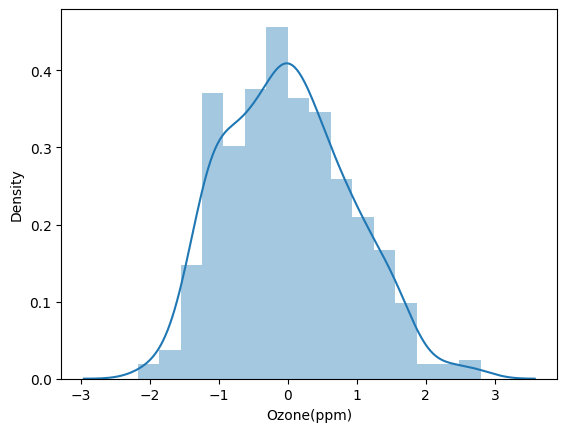

In [47]:
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)
sns.distplot(y_test - y_test_predictions)

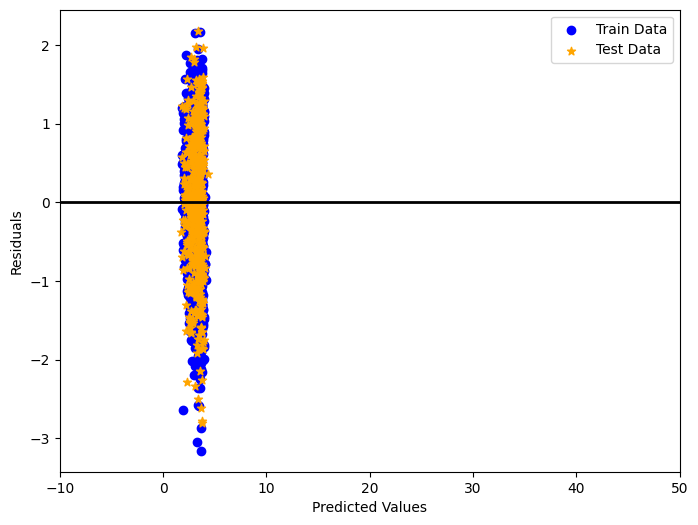

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions - y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

In [50]:
print('MSE for training data: {:.2f}'.format(metrics.mean_squared_error(y_train, y_train_predictions)))
print('MSE for test data: {:.2f}'.format(metrics.mean_squared_error(y_test, y_test_predictions)))

MSE for training data: 0.78
MSE for test data: 0.82


In [52]:
from sklearn.metrics import r2_score

print("Coefficient of determination R^2 <-- on train set: {:.2f}".format(r2_score(y_train, y_train_predictions)))
print("Coefficient of determination R^2 <-- on test set: {:.2f}".format(r2_score(y_test, y_test_predictions)))

Coefficient of determination R^2 <-- on train set: 0.24
Coefficient of determination R^2 <-- on test set: 0.23


## Polynomial Regression - With Multiple Variable (Multivariate)

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

y_pred = polyreg.predict(poly.fit_transform(X_test))

r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is: {:.2f}'.format(r_square))
print('MSE for testing data: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))


R-Square Error associated with Polynomial Regression is: 0.32
MSE for testing data: 0.73


Using Polynomial Regression of degree 2 has reduced the Mean Square Error from 0.82 to 0.72

and has increased the R squared values from 22 to 31.

# Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print('Best parameters:', lasso_regressor.best_params_)
print('Best score: {:.2f}'.format(lasso_regressor.best_score_))

Best parameters: {'alpha': 0.01}
Best score: -0.81


<Axes: xlabel='Ozone(ppm)', ylabel='Density'>

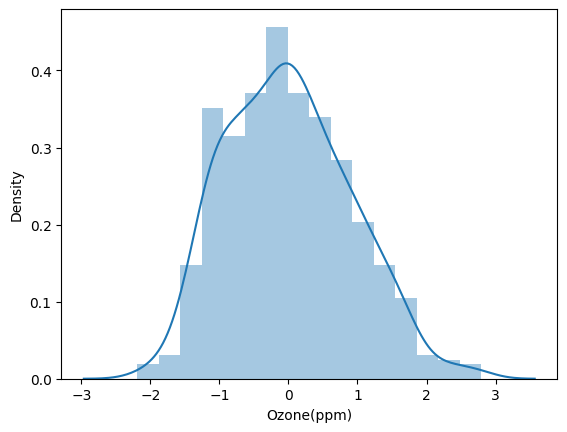

In [55]:
prediction_lasso = lasso_regressor.predict(X_test)
sns.distplot(y_test - prediction_lasso)

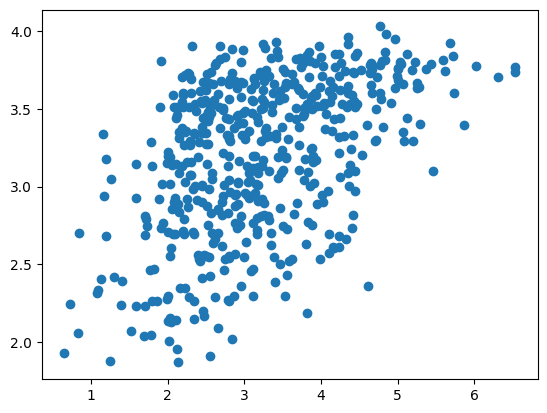

In [56]:
plt.scatter(y_test, prediction_lasso)

In [57]:
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_lasso)))
print('MSE: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_lasso)))
print('RMSE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso))))

MAE: 0.73
MSE: 0.82
RMSE: 0.90


# Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [59]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-0.8094665811172606


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
print("Coefficient of determination R^2 <-- on train set: {:.2f}".format(rf.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {:.2f}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.91
Coefficient of determination R^2 <-- on test set: 0.38


In [63]:
score = cross_val_score(rf, X, y, cv=5)
score.mean()

0.29974342648080915

In [64]:
RandomForestRegressor()

RandomForestRegressor()

In [65]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [67]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
rf1 = RandomForestRegressor()
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf1_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)